In [1]:
#example 
import pandas as pd
import os

In [3]:
from phase_extender.hapstats import plot_stacked_haplotypes_variants, get_melted_df, plot_hist_one_chr_stacked, get_merged_metrices

In [5]:
def merge_stats_files(initial_df_path, final_df_path, outputdir=None, return_df= False):
    if outputdir is None:
        outputdir = os.getcwd()
    os.makedirs(outputdir, exist_ok=True)    

    initial_hap_df = pd.read_csv(initial_df_path, sep='\t')
    final_hap_df = pd.read_csv(final_df_path, sep='\t', )
    concat_df = pd.concat([initial_hap_df, final_hap_df], ignore_index=True)
    concat_df["stage"] = ["initial", "final"]
    concat_df.to_csv(outputdir+'/merged_stats.tsv', index=False, sep='\t')
    print("Merged successfully")
    if return_df:
        return concat_df

## For first iteration

In [6]:
initial_df_path = '../../data/SetA/phased_NA12891_SetA_run01/initial_haplotype_stats_NA12891.txt'
final_df_path = "../../data/SetA/phased_NA12891_SetA_run01/final_haplotype_stats_NA12891.txt"
outputdir='../../data/plots/NA12891/setA/iter01'

soi= 'NA12891'

In [7]:
iter1_df = merge_stats_files(initial_df_path, final_df_path, outputdir, return_df=True)
iter1_df

Merged successfully


,CHROM,NA12891:PI,num_Vars_by_PI,range_of_PI,total_haplotypes,total_Vars,stage
0,20,"1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...","5,6,3,3,3,4,5,3,4,8,7,4,5,7,3,4,6,3,4,5,5,9,5,...","18860,39198,6180,11396,15999,1754,11424,1913,1...",1933,9666,initial
1,20,"1.0,5.0,9.0,12.0,13.0,17.0,18.0,20.0,21.0,22.0...","17,15,19,4,19,6,7,5,5,27,22,5,51,8,5,34,5,4,14...","83618,40234,56755,57384,147745,25885,26293,271...",391,9666,final


## For second iteration

In [8]:
# For first iteration
# soi='MA625'
initial_df_path2 = '../../data/SetB/phased_NA12891_SetB_run01/initial_haplotype_stats_NA12891.txt'
final_df_path2 = "../../data/SetB/phased_NA12891_SetB_run01/final_haplotype_stats_NA12891.txt"
outputdir2='../../data/plots/NA12891/setB/iter01'

soi= 'NA12891'

In [9]:
iter2_df = merge_stats_files(initial_df_path2, final_df_path2, outputdir2, return_df=True)
iter2_df

Merged successfully


,CHROM,NA12891:PI,num_Vars_by_PI,range_of_PI,total_haplotypes,total_Vars,stage
0,20,"1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...","5,6,3,3,3,4,5,3,4,8,7,4,5,7,3,4,6,3,4,5,5,9,5,...","18860,39198,6180,11396,15999,1754,11424,1913,1...",1933,9666,initial
1,20,"1.0,5.0,9.0,12.0,13.0,17.0,20.0,21.0,22.0,24.0...","17,15,19,4,19,13,5,5,14,7,6,6,4,17,22,5,61,15,...","83618,40234,56755,57384,147745,83182,27164,476...",207,9666,final


## Now merged stats from two iteration to reproduce results.

In [13]:
path1 = outputdir+ '/merged_stats.tsv'
path2 = outputdir2+ '/merged_stats.tsv'


In [16]:
df1 = pd.read_csv(path1, sep='\t')
df2 = pd.read_csv(path2, sep='\t')

merged = pd.concat([df1, df2], ignore_index=True)
# merged['stage'] = ['initial', 'iteration01', 'iteration01', 'iteration02']
merged= merged.drop_duplicates()

merged

,CHROM,NA12891:PI,num_Vars_by_PI,range_of_PI,total_haplotypes,total_Vars,stage
0,20,"1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...","5,6,3,3,3,4,5,3,4,8,7,4,5,7,3,4,6,3,4,5,5,9,5,...","18860,39198,6180,11396,15999,1754,11424,1913,1...",1933,9666,initial
1,20,"1.0,5.0,9.0,12.0,13.0,17.0,18.0,20.0,21.0,22.0...","17,15,19,4,19,6,7,5,5,27,22,5,51,8,5,34,5,4,14...","83618,40234,56755,57384,147745,25885,26293,271...",391,9666,final
3,20,"1.0,5.0,9.0,12.0,13.0,17.0,20.0,21.0,22.0,24.0...","17,15,19,4,19,13,5,5,14,7,6,6,4,17,22,5,61,15,...","83618,40234,56755,57384,147745,83182,27164,476...",207,9666,final


In [17]:
merged = pd.concat([iter1_df, iter2_df], ignore_index=True)
merged= merged.drop_duplicates()
merged['stage'] = ['initial', 'iteration01',  'iteration02']
merged

,CHROM,NA12891:PI,num_Vars_by_PI,range_of_PI,total_haplotypes,total_Vars,stage
0,20,"1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...","5,6,3,3,3,4,5,3,4,8,7,4,5,7,3,4,6,3,4,5,5,9,5,...","18860,39198,6180,11396,15999,1754,11424,1913,1...",1933,9666,initial
1,20,"1.0,5.0,9.0,12.0,13.0,17.0,18.0,20.0,21.0,22.0...","17,15,19,4,19,6,7,5,5,27,22,5,51,8,5,34,5,4,14...","83618,40234,56755,57384,147745,25885,26293,271...",391,9666,iteration01
3,20,"1.0,5.0,9.0,12.0,13.0,17.0,20.0,21.0,22.0,24.0...","17,15,19,4,19,13,5,5,14,7,6,6,4,17,22,5,61,15,...","83618,40234,56755,57384,147745,83182,27164,476...",207,9666,iteration02


In [19]:
merged

,CHROM,NA12891:PI,num_Vars_by_PI,range_of_PI,total_haplotypes,total_Vars,stage
0,20,"1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...","5,6,3,3,3,4,5,3,4,8,7,4,5,7,3,4,6,3,4,5,5,9,5,...","18860,39198,6180,11396,15999,1754,11424,1913,1...",1933,9666,initial
1,20,"1.0,5.0,9.0,12.0,13.0,17.0,18.0,20.0,21.0,22.0...","17,15,19,4,19,6,7,5,5,27,22,5,51,8,5,34,5,4,14...","83618,40234,56755,57384,147745,25885,26293,271...",391,9666,iteration01
3,20,"1.0,5.0,9.0,12.0,13.0,17.0,20.0,21.0,22.0,24.0...","17,15,19,4,19,13,5,5,14,7,6,6,4,17,22,5,61,15,...","83618,40234,56755,57384,147745,83182,27164,476...",207,9666,iteration02


NameError: name 'merged' is not defined

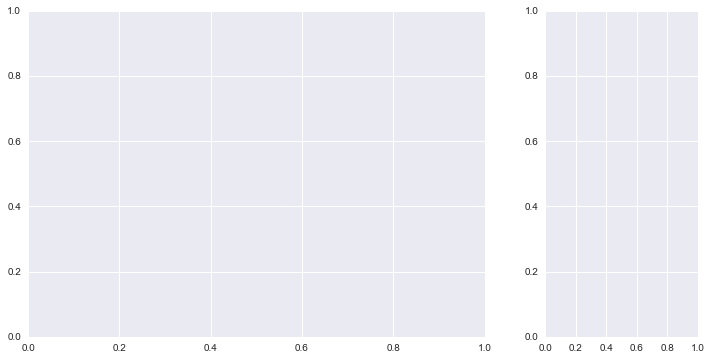

In [20]:
plot_stacked_haplotypes_variants(merged_df=merged)

In [21]:
genomic_dist = get_melted_df(merged, col_name= 'range_of_PI')

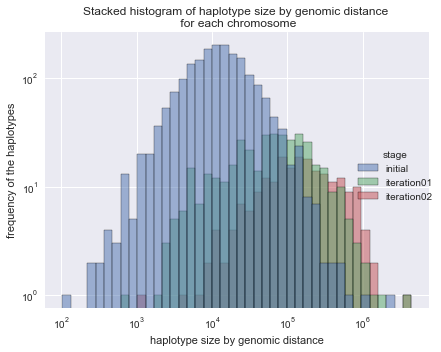

In [22]:
plot_hist_one_chr_stacked(genomic_dist, hist_by="range_of_PI",show_plot=True, logscale_y=10, logscale_x=10)

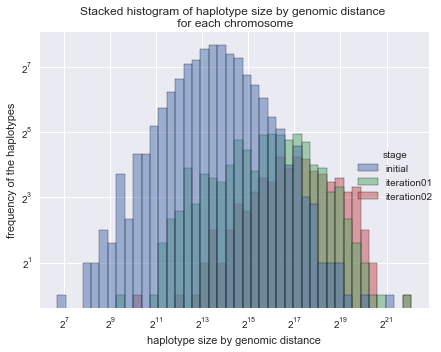

In [23]:
plot_hist_one_chr_stacked(genomic_dist, hist_by="range_of_PI",show_plot=True, logscale_y=2, logscale_x=2)

In [24]:
num_vars = get_melted_df(merged, col_name = "num_Vars_by_PI")

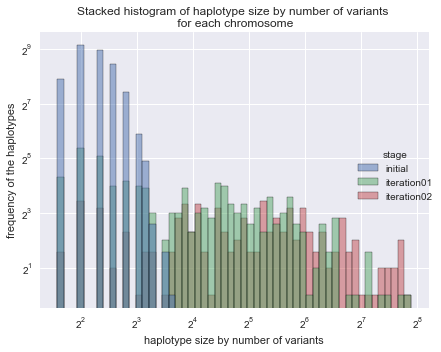

In [26]:
plot_hist_one_chr_stacked(num_vars,hist_by= "num_Vars_by_PI",logscale_y=2, logscale_x=2, show_plot=True)


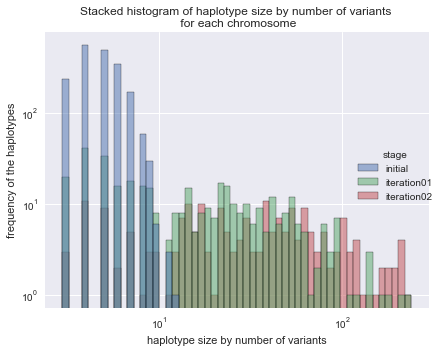

In [27]:
plot_hist_one_chr_stacked(num_vars,hist_by= "num_Vars_by_PI",logscale_y=10, logscale_x=10, show_plot=True)


In [28]:
get_merged_metrices(merged,)


,CHROM,max_range_pi,min_range_pi,max_num_vars_pi,min_num_vars_pi,stage
0,20,2057927,104,12,3,initial
1,20,4386983,753,237,3,iteration01
3,20,3442116,1290,232,3,iteration02
